In [20]:
# imports
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [5]:
test = pd.read_csv(r'C:\Users\Cait\Desktop\Bootcamp Stuff\Group1-Project1\Resources\Fitbit_apple_watch_data\aw_fb_data.csv')
test['height'].nunique()

# create dataframes from csv files
#How do Apple watches vs. Fitbits compare when taking heart rate data?
# Need dataframe from Fitbit_apple_watch_data.csv


28

In [6]:
#How does the activity level correlate to average heart rate?
# Need dataframe from heartrate_seconds_merged.csv and dailyIntensities_merged
heartrate = pd.read_csv(r'Resources\Fitbit_data\heartrate_seconds_merged.csv')
heartrate = heartrate.drop(columns=['Time'])
intensity = pd.read_csv(r'Resources\Fitbit_data\dailyIntensities_merged.csv')
intensity = intensity.drop(columns=['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance','ActivityDay'])

In [7]:
#merge the heart rate data with the activity level data
act_level_avg_heart_rate = pd.merge(heartrate,intensity,how='inner',on='Id')
act_level_avg_heart_rate.rename(columns={'Value':'BeatsPerMin'},inplace=True)
act_level_avg_heart_rate.head()

,Id,BeatsPerMin,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,2022484408,97,1157,227,14,42
1,2022484408,97,1100,292,5,43
2,2022484408,97,1148,257,3,32
3,2022484408,97,1122,282,9,27
4,2022484408,97,1237,151,11,41


In [22]:
#create summary table to show each participants average activity and average heart rate for length of experiment
summary_act_heart_rate = act_level_avg_heart_rate.groupby('Id').mean()
summary_act_heart_rate

,BeatsPerMin,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
Id,,,,,
2022484408,80.236860,1112.580645,257.451613,19.354839,36.290323
2026352035,93.776305,689.419355,256.645161,0.258065,0.096774
2347167796,76.722792,687.166667,252.500000,20.555556,13.500000
4020332650,82.300577,1237.258065,76.935484,5.354839,5.193548
4388161847,66.132998,836.677419,229.354839,20.354839,23.161290
4558609924,81.673947,1093.612903,284.967742,13.709677,10.387097
5553957443,68.633093,668.354839,206.193548,13.000000,23.419355
5577150313,69.564516,754.433333,147.933333,29.833333,87.333333
6117666160,83.749891,796.285714,288.357143,2.035714,1.571429


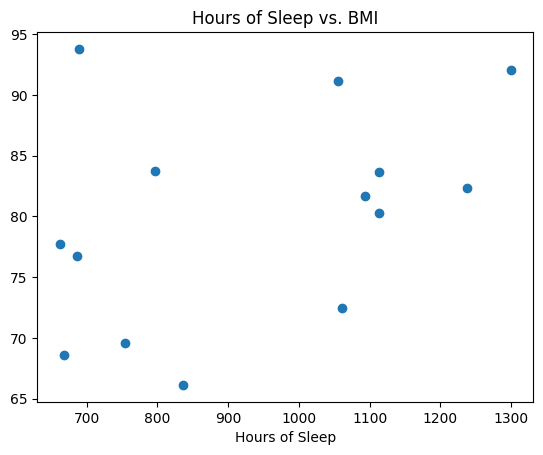

In [23]:
plt.scatter(summary_act_heart_rate['SedentaryMinutes'],summary_act_heart_rate['BeatsPerMin'])
plt.title('Hours of Sleep vs. BMI')
plt.xlabel('Hours of Sleep')
plt.show()

In [9]:
# How does the amount of sleep affect weight?
# Need dataframe from sleepDay_merged and weightLogInfo_merged

sleepDay = pd.read_csv(r'Resources\Fitbit_data\sleepDay_merged.csv')
sleepDay = sleepDay.drop(columns=['SleepDay','TotalSleepRecords','TotalTimeInBed'])
weightLog = pd.read_csv(r'Resources\Fitbit_data\weightLogInfo_merged.csv')
weightLog = weightLog.drop(columns=['Fat','WeightKg','Date','WeightPounds','IsManualReport','LogId'])
avg_weight = weightLog.groupby('Id').mean()

In [19]:
#merge the total minutes asleep with the BMI data
sleep_weight = pd.merge(sleepDay,weightLog,how='inner',on='Id')
unique_ids = sleep_weight['Id'].unique()
#convert minutes of sleep to hours
sleep_weight['HoursSleep'] = sleep_weight['TotalMinutesAsleep']/60
#drop the minutes column
sleep_weight = sleep_weight.drop(columns=['TotalMinutesAsleep'])
sleep_weight.head()

,Id,BMI,HoursSleep
0,1503960366,22.650000,5.450000
1,1503960366,22.650000,5.450000
2,1503960366,22.650000,6.400000
3,1503960366,22.650000,6.400000
4,1503960366,22.650000,6.866667
...,...,...,...
1083,6962181067,23.889999,8.600000
1084,6962181067,24.350000,8.600000
1085,6962181067,24.240000,8.600000
1086,6962181067,24.170000,8.600000


In [ ]:
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

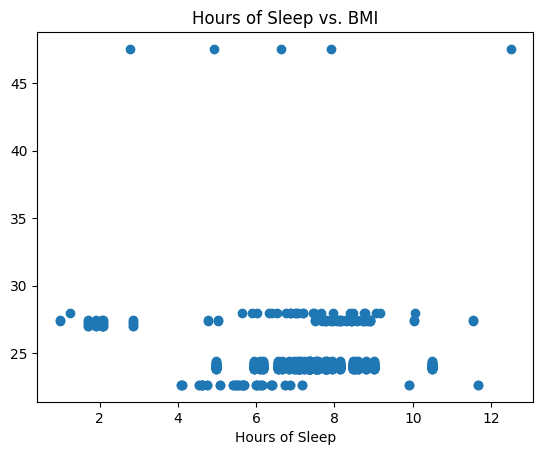

In [21]:
plt.scatter(sleep_weight['HoursSleep'],sleep_weight['BMI'])
plt.title('Hours of Sleep vs. BMI')
plt.xlabel('Hours of Sleep')
plt.show()

In [17]:
# set index to participant ID
sleep_weight = sleep_weight.reset_index().set_index('Id')
sleep_weight.drop(columns=['index'])

,TotalMinutesAsleep,BMI
Id,,
1503960366,327,22.650000
1503960366,327,22.650000
1503960366,384,22.650000
1503960366,384,22.650000
1503960366,412,22.650000
...,...,...
6962181067,516,23.889999
6962181067,516,24.350000
6962181067,516,24.240000


In [24]:
#create summary table to show each participants average amount of sleep and BMI
sleep_weight_summary = sleep_weight[["TotalMinutesAsleep", "BMI"]].groupby("Id").mean()
sleep_weight_summary.head()

,TotalMinutesAsleep,BMI
Id,,
1503960366,360.280000,22.650000
1927972279,417.000000,47.540001
4319703577,476.653846,27.415000
4558609924,127.600000,27.214000
5577150313,432.000000,28.000000


In [23]:
#How does the activity level affect number of calories burned?
# Need dataframe from dailyActivity 
activity = pd.read_csv(r'Resources\Fitbit_data\dailyActivity_merged.csv')
activity = activity.drop(columns=['ActivityDate','TotalSteps','TotalDistance','TrackerDistance','LoggedActivitiesDistance',
                                  'VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance'])
activity.head()

,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,25,13,328,728,1985
1,1503960366,21,19,217,776,1797
2,1503960366,30,11,181,1218,1776
3,1503960366,29,34,209,726,1745
4,1503960366,36,10,221,773,1863


In [22]:
#create summary table to show each participants average activity and daily calories burned
activity_summary = activity.groupby("Id").mean()
activity_summary.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,
1503960366,38.709677,19.161290,219.935484,848.161290,1816.419355
1624580081,8.677419,5.806452,153.483871,1257.741935,1483.354839
1644430081,9.566667,21.366667,178.466667,1161.866667,2811.300000
1844505072,0.129032,1.290323,115.451613,1206.612903,1573.483871
1927972279,1.322581,0.774194,38.580645,1317.419355,2172.806452
